In [ ]:
import os
import json
from tqdm import tqdm
import numpy as np
from LLM_as_judgement import chat_LLM

file_path = "/home/ubuntu/jiaxi/results/output_Idefics3-8B-Llama3_MMMU_Math/results/biology_answer_Idefics3-8B-Llama3.jsonl"
scores = []
with open(file_path, 'r') as f:
    for line in tqdm(f, total=200, desc=f"Processing {file_path}"):
        data = json.loads(line)
        # user_prompt = data['user_prompt']
        response = data['model_answer']
        print(response)
        
        score = chat_LLM(response)
        print(score)

        # Score是否可以转变成float
        try:
            score = float(score)
        except ValueError:
            score = None

        scores.append(score)
    
    avg_score = np.mean(np.array(scores))
    print(f"Average score for {file_path}: {avg_score}")


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:   0%|          | 0/200 [00:00<?, ?it/s]

 The diagram shows a circle with a point X on the circumference. A line segment AX is drawn from point A to point X, and a line segment XT is drawn from point X to point T.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:   0%|          | 1/200 [00:01<06:08,  1.85s/it]

0
 3.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:   1%|          | 2/200 [00:02<04:06,  1.24s/it]

0
 The number 9 is written on the edge that connects the circle labeled with the number 9 to the circle labeled with the number 9.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:   2%|▏         | 3/200 [00:03<03:33,  1.08s/it]

0
 The image provided is a graph that appears to be a plot of a function. The graph is titled "Improving a basic feasible solution." The x-axis is labeled as "x1," and the y-axis is labeled as "y." The graph has two distinct regions: a horizontal line segment and a diagonal line segment.

### Description of the Graph:

1. **Horizontal Line Segment:**
   - The horizontal line segment is located at the bottom of the graph and extends from the left to the right. It is labeled as "Moving toward a better basic feasible solution." This line segment is horizontal, indicating that the value of y remains constant as x1 increases.

2. **Diagonal Line Segment:**
   - The diagonal line segment starts from the bottom left of the graph and extends upward to the right. It is labeled as "Basic feasible solution." This line segment has a positive slope, indicating that as x1 increases, y also increases.

### Analysis:

The graph appears to be


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:   2%|▏         | 4/200 [00:04<03:14,  1.01it/s]

0
 A diagram shows a triangle with a line through it that is labeled as 4 mm and another line that is labeled as 3 mm.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:   2%|▎         | 5/200 [00:05<03:12,  1.01it/s]

0
 The given figure depicts a parabola with a focus labeled as stage. The focus is positioned at a distance of 10 yards from the vertex of the parabola.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:   3%|▎         | 6/200 [00:06<03:11,  1.01it/s]

0
 I cannot answer the question as the image does not contain any text or numbers that can be used to solve a math problem.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:   4%|▎         | 7/200 [00:07<02:54,  1.11it/s]

1
 {'Task': 'A', 'Duration': '12', 'Preceding tasks': 'C, F'} 
{'Task': 'B', 'Duration': '5', 'Preceding tasks': 'C, G'} 
{'Task': 'C', 'Duration': '12', 'Preceding tasks': '_'} 
{'Task': 'D', 'Duration': '3', 'Preceding tasks': 'J, K'} 
{'Task': 'E', 'Duration': '10', 'Preceding tasks': 'A, B'} 
{'Task': 'F', 'Duration': '5', 'Preceding tasks': 'G'} 
{'Task': 'G', 'Duration': '7', 'Preceding tasks': '_'} 
{'Task': 'H', 'Duration': '3', 'Preceding tasks': 'F'} 
{'Task': 'I', 'Duration': '3', 'Preceding tasks':


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:   4%|▍         | 8/200 [00:08<03:01,  1.06it/s]

0
 The x-axis is labeled along the bottom of the graph.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:   4%|▍         | 9/200 [00:08<02:55,  1.09it/s]

0
 70, 62, 66, 78, 80, 75.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:   5%|▌         | 10/200 [00:15<07:54,  2.50s/it]

0
 Fig. 16-27


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:   6%|▌         | 11/200 [00:16<06:36,  2.10s/it]

0
 The bar graph shows the number of blue objects before, after, and the difference between the two.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:   6%|▌         | 12/200 [00:17<05:28,  1.75s/it]

0
 The answer is 5.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:   6%|▋         | 13/200 [00:18<04:41,  1.50s/it]

0
 I cannot answer this question as it is not related to Math.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:   7%|▋         | 14/200 [00:18<04:01,  1.30s/it]

1
 The image depicts a vertical cylindrical shape with a circular base and top. The cylinder is divided into two distinct sections by a horizontal line labeled "r." The top section is labeled "h" and appears to be a height measurement. The bottom section is labeled "r" and seems to represent a radius measurement. The cylinder is filled with a pattern of small dots, which could represent a type of material or substance.

The image is accompanied by a reference to "Fig. 14-19," suggesting that it is part of a larger figure or diagram, possibly from a scientific or technical document. The labels "h" and "r" are standard notations used in geometry and physics to denote height and radius, respectively.

### Analysis and Description:

1. **Cylindrical Shape**: The shape of the object is a cylinder, which is a three-dimensional geometric figure with two parallel circular bases connected by a curved surface. The top and bottom bases are congruent circles, and the height is the


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:   8%|▊         | 15/200 [00:19<03:41,  1.20s/it]

0
 The image is a graphical representation of a mathematical optimization problem, specifically a linear programming problem. The graph shows the feasible region and the objective function. The feasible region is a polygon formed by the intersection of the constraints. The constraints are represented by lines, and the vertices of the feasible region are the points where these lines intersect.

### Description of the Graph:

1. **Axes and Labels**:
   - The x-axis is labeled as "x1" and the y-axis is labeled as "x2".
   - The x-axis ranges from -2.0 to 2.0.
   - The y-axis ranges from -2.0 to 4.0.

2. **Constraints**:
   - There are four constraints represented by lines:
     - The first constraint is a horizontal line at y = 0.
     - The second constraint is a vertical line at x = 0.
     - The third constraint is a line with a negative slope, passing through the point (


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:   8%|▊         | 16/200 [00:20<03:27,  1.13s/it]

0
 The answer is 8.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:   8%|▊         | 17/200 [00:22<04:00,  1.32s/it]

0
 The x-axis shows a minimum of -2 and a maximum of 1 while the y-axis shows a minimum of 0 and a maximum of 1. There is a curve with the equation r = sqrt(0 + cos(2 * x)) in the first quadrant.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:   9%|▉         | 18/200 [00:23<03:49,  1.26s/it]

0
 {'header': ['State of Birth', 'tall', 'freq', '% freq'], 'rows': [['Victoria', '###', '###', '###'], ['NSW', '###', '###', '###'], ['Queensland', '###', '###', '###'], ['WA', '###', '###', '###'], ['Other', '###', '###', '###'], ['Total', '###', '###', '###']]}


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  10%|▉         | 19/200 [00:27<06:13,  2.07s/it]

0
 The x-coordinate of the point T is 0. The y-coordinate of the point T is -1/8 * 0^2 + 2 = 2. Therefore, the coordinates of the point T are (0, 2). The slope of the line passing through the points R and T is (2 - 0) / (0 - 0) = 2 / 0. The line is undefined. The slope of the line passing through the points R and T is undefined. The equation of the line passing through the points R and T is undefined. There is no line passing through the points R and T.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  10%|█         | 20/200 [00:28<05:15,  1.75s/it]

0
 [0 1 1 2 0 ]
[1 0 0 0 1 ]
[1 0 0 1 1 ]
[2 0 1 0 0 ]
[0 1 1 0 0 ]


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  10%|█         | 21/200 [00:32<06:48,  2.28s/it]

0
 The number 4 is written on the corner of the shape.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  11%|█         | 22/200 [00:33<05:31,  1.86s/it]

0
 The lengths of the two sides of the triangle are 1 and 3, so the length of the hypotenuse is $\sqrt{1^2 + 3^2} = \sqrt{1 + 9} = \sqrt{10}$. Therefore the final answer is 10.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  12%|█▏        | 23/200 [00:34<05:00,  1.70s/it]

0
 The total number of HIV+ is 75. The total number of HIV- is 100,000. The total number of Test+ is 75. The total number of Test- is 100,000. The total number of Test is 100,000. The total number of HIV is 100,000.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  12%|█▏        | 24/200 [00:35<04:11,  1.43s/it]

0
 In the given diagram, there is a parallelogram labeled as ABCD with vertices A, B, C, and D. The vertices A and B are connected by a line segment AB, and the vertices C and D are connected by a line segment CD. The line segment AB is parallel to the line segment CD. The line segment AD is perpendicular to the line segment BC. The line segment AD is also perpendicular to the line segment CD. The line segment AB is perpendicular to the line segment AD. The line segment CD is perpendicular to the line segment AD. The line segment AB is perpendicular to the line segment CD. The line segment AD is perpendicular to the line segment BC. The line segment CD is perpendicular to the line segment AB. The line segment AD is perpendicular to the line segment BC. The line segment CD is perpendicular to the line segment AB. The line segment AD is perpendicular to the line segment BC. The line segment CD is perpendicular to the line segment AB. The line


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  12%|█▎        | 25/200 [00:36<03:37,  1.24s/it]

0
 The x-axis has a minimum of 0 and a maximum of 4.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  13%|█▎        | 26/200 [00:36<03:13,  1.11s/it]

0
 The x-axis has a minimum value of 0 and a maximum value of 8.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  14%|█▎        | 27/200 [00:39<04:44,  1.64s/it]

0
 150 feet.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  14%|█▍        | 28/200 [00:40<04:17,  1.50s/it]

0
 The image consists of four identical gray circles arranged in a square pattern. Each circle is perfectly round and has a uniform gray color. The circles are evenly spaced, with each circle touching the other three circles at their edges. The background of the image is white, providing a stark contrast to the gray circles.

### Analysis and Description

1. **Shape and Arrangement**:
   - The image features four identical circles.
   - The circles are arranged in a square pattern, with each circle touching the other three circles at their edges.
   - The arrangement suggests a symmetrical and orderly layout.

2. **Color**:
   - The circles are uniformly colored in gray.
   - The gray color is consistent across all four circles, indicating a uniformity in the visual presentation.

3. **Background**:
   - The background of the image is white.
   - The white background provides a clear contrast to the gray circles, making them stand out prominently.

### Relevant Knowledge Integration

-

Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  14%|█▍        | 29/200 [00:41<03:55,  1.37s/it]

0
 The x-axis has a label with a variable x on the end of it. The y-axis has a label with a variable y on the end of it. There is a curve with an arrow pointing at the top right of it. There is a curve with an arrow pointing at the bottom right of it. There is a curve with an arrow pointing at the bottom left of it. There is a curve with an arrow pointing at the top left of it. There is a curve with an arrow pointing at the top left of it. There is a curve with an arrow pointing at the top left of it. There is a curve with an arrow pointing at the top left of it. There is a curve with an arrow pointing at the top left of it. There is a curve with an arrow pointing at the top left of it. There is a curve with an arrow pointing at the top left of it. There is a curve with an arrow pointing at the top left of it. There is a


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  15%|█▌        | 30/200 [00:43<04:02,  1.42s/it]

0
 The graph shows the graph of f(x). The x-axis shows the variable x along a linear scale of range 0 to 4.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  16%|█▌        | 31/200 [00:44<03:27,  1.23s/it]

0
 In the given diagram, we can see a triangle labeled ABC. Point D is located on the side BC, and point E is located on the side AC. Point F is located on the side AB.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  16%|█▌        | 32/200 [00:45<03:11,  1.14s/it]

0
 The graph shows a function $y = f(x)$ and a function $B(b, f(b))$. The graph of $y = f(x)$ is a curve that starts at the origin, goes up, and then goes down. The graph of $B(b, f(b))$ is a horizontal line that is above the graph of $y = f(x)$.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  16%|█▋        | 33/200 [00:46<03:23,  1.22s/it]

0
 The x-axis has a minimum of -6 and a maximum of 6.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  17%|█▋        | 34/200 [00:47<03:05,  1.12s/it]

0
 The length of the hypotenuse of the R triangle is 25. The length of the x side is 7. Therefore, the length of the y side is equal to $\sqrt{25^2 - 7^2} = \sqrt{625 - 49} = \sqrt{576} = 24$.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  18%|█▊        | 35/200 [00:48<03:18,  1.20s/it]

0
 The answer is not a number.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  18%|█▊        | 36/200 [00:49<02:55,  1.07s/it]

1
 -1.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  18%|█▊        | 37/200 [00:50<02:37,  1.03it/s]

0
 The y-axis shows a linear scale from -4 to 4. The x-axis shows a linear scale with a minimum of 0 and a maximum of 4. There is a line diagram with a blue line that has a negative slope. The line is labeled "y".


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  19%|█▉        | 38/200 [00:51<02:40,  1.01it/s]

0
 The diagram shows a cone with a height of 16 units and a base diameter of 4 units.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  20%|█▉        | 39/200 [00:52<02:37,  1.02it/s]

0
 The answer is 4.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  20%|██        | 40/200 [00:53<02:29,  1.07it/s]

0
 The answer is not applicable, as there is no information provided about the lengths of the line segments or the shape of the figure.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  20%|██        | 41/200 [00:54<02:27,  1.08it/s]

1
 The x-axis in the diagram has a scale from 0 to 20.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  21%|██        | 42/200 [00:55<02:26,  1.08it/s]

0
 The graph is a parabola.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  22%|██▏       | 43/200 [00:56<02:33,  1.03it/s]

0
 The lengths of the three sides of the ABC triangle are 5, 4, and 3, so the semi-perimeter equals (5 + 4 + 3) / 2 = 6. Therefore, the area is $\sqrt{6*(6-5)*(6-4)*(6-3)} = \sqrt{6*1*2*3} = \sqrt{36} = 6$. Therefore the final answer is 6.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  22%|██▏       | 44/200 [00:57<02:44,  1.05s/it]

0
 In the given diagram, there is a circle with points A, B, C, and D on its circumference. Point A is connected to points B and D, and point B is connected to points C and D. The line segment AB is perpendicular to the line segment CD.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  22%|██▎       | 45/200 [00:58<02:32,  1.02it/s]

0
 {'Task': 'A', 'Duration': '12', 'Preceding tasks': 'C, F'} 
{'Task': 'B', 'Duration': '5', 'Preceding tasks': 'C, G'} 
{'Task': 'C', 'Duration': '12', 'Preceding tasks': '_'} 
{'Task': 'D', 'Duration': '3', 'Preceding tasks': 'J, K'} 
{'Task': 'E', 'Duration': '10', 'Preceding tasks': 'A, B'} 
{'Task': 'F', 'Duration': '5', 'Preceding tasks': 'G'} 
{'Task': 'G', 'Duration': '7', 'Preceding tasks': '_'} 
{'Task': 'H', 'Duration': '3', 'Preceding tasks': 'F'} 
{'Task': 'I', 'Duration': '3', 'Preceding tasks':


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  23%|██▎       | 46/200 [00:59<02:37,  1.03s/it]

0
 The given image is a diagram of a graph with labeled vertices and edges. The graph appears to be a directed graph, as indicated by the arrows pointing between the vertices. The vertices are labeled with letters from the alphabet, and the edges are numbered from 1 to 9. The graph is connected, meaning that there is a path between every pair of vertices.

Here is a detailed description of the graph:

1. The graph has 9 vertices labeled A, B, C, D, E, F, G, H, and I.
2. The edges are labeled with numbers from 1 to 9.
3. The edges are directed, meaning they have arrows indicating the direction of the connection between vertices.
4. The vertices are connected in a way that forms a cycle, with the following connections:
   - A is connected to B (edge 1)
   - B is connected to C (edge 2)
   - C is connected to D (edge 3)



Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  24%|██▎       | 47/200 [01:00<02:34,  1.01s/it]

0
 The graph shows a scatter plot with a blue dot plot. The x-axis shows the number from -10 to 15. The y-axis shows the number from -10 to 15.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  24%|██▍       | 48/200 [01:01<02:27,  1.03it/s]

0
 In the diagram, there is a circle labeled as circle O. Inside the circle, there is a triangle labeled as triangle ABC. The triangle is inscribed in the circle, meaning that all three vertices of the triangle lie on the circumference of the circle. The sides of the triangle are labeled as AB, BC, and AC. The center of the circle is labeled as O.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  24%|██▍       | 49/200 [01:03<03:08,  1.25s/it]

0
 The lateral area of the cone is 24$\pi$ square inches. What is the volume of the cone?


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  25%|██▌       | 50/200 [01:06<05:05,  2.03s/it]

0
 The graph shows the relationship between magazine advertisements and television commercials.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  26%|██▌       | 51/200 [01:07<04:12,  1.69s/it]

0
 In the given figure, we can see that there are two triangles, ABC and DEF. The vertices of triangle ABC are A, B, and C, and the vertices of triangle DEF are D, E, and F.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  26%|██▌       | 52/200 [01:08<03:37,  1.47s/it]

0
 In the given diagram, there is a quadrilateral ABCD with vertices A, B, C, and D. The line segments AB and CD are parallel, and the line segments AD and BC are parallel.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  26%|██▋       | 53/200 [01:10<03:39,  1.49s/it]

0
 The length of the hypotenuse of the ABC triangle is 3 and the length of the side opposite to the B angle is 2, so the length of the AB side is $\sqrt{3^2 - 2^2} = \sqrt{9 - 4} = \sqrt{5}$. The length of the hypotenuse of the ACD triangle is 3 and the length of the side opposite to the C angle is 2, so the length of the AC side is $\sqrt{3^2 - 2^2} = \sqrt{9 - 4} = \sqrt{5}$. The lengths of the AB and AC sides of the ABC triangle are $\sqrt{5}$ and $\sqrt{5}$, so the triangle is an isosceles triangle and the angle at the vertex B is $180^\circ - 2 \times 45^\circ = 90^\circ$. The length of the hypotenuse


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  27%|██▋       | 54/200 [01:11<03:11,  1.31s/it]

0
 The table shows the function g(x) and its first and second derivatives, f'(x) and f''(x), for the function g(x). The first derivative of g(x) is g'(x) = -2x + 3 and the second derivative of g(x) is g''(x) = -2.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  28%|██▊       | 55/200 [01:12<02:52,  1.19s/it]

0
 The side of the S shape is located in the first quadrant and the other side is located in the second quadrant. Therefore, the length of the side of the S shape is 3. The length of the side of the T shape is 2. Therefore, the area of the S shape is $\frac{3 * 2}{2} = 3$. Therefore the final answer is 3.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  28%|██▊       | 56/200 [01:13<02:38,  1.10s/it]

0
 The length of the line segment BC is 4.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  28%|██▊       | 57/200 [01:14<02:56,  1.23s/it]

0
 The answer is 2.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  29%|██▉       | 58/200 [01:15<02:37,  1.11s/it]

0
 The diameter of the smaller cone is 3 and its height is 3. The length of the hypotenuse of the smaller cone can be calculated as $\sqrt{3^2 + 3^2} = \sqrt{9 + 9} = \sqrt{18}$. The diameter of the larger cone is 6 so the length of the hypotenuse is 6. Therefore, the ratio of the length of the hypotenuse of the smaller cone to the length of the hypotenuse of the larger cone is $\frac{\sqrt{18}}{6} = \frac{\sqrt{2}}{2}$. Therefore, the height of the larger cone is $\frac{\sqrt{2}}{2} * 6 = \frac{6\sqrt{2}}{2} = 3\sqrt{2}$. The radius of the larger cone is 6 and the height is $3\sqrt{2}$ so the area of the


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  30%|██▉       | 59/200 [01:16<02:23,  1.02s/it]

0
 The lengths of the AB, BC, CD, and AD sides of the ABCD quadrilateral are 7, 24, 20, and 15, respectively. The length of the CD side is greater than the length of the AB side.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  30%|███       | 60/200 [01:17<02:25,  1.04s/it]

0
 The graph shows the percentage of students who ride a car or walk to school in the United States from 1969 to 2017. In 2017, about 85 percent of students rode a car to school.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  30%|███       | 61/200 [01:18<02:36,  1.12s/it]

0
 The number in the center of the image is 8.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  31%|███       | 62/200 [01:19<02:29,  1.08s/it]

0
 The frequencies and percentages of the colours of cars add up to 65.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  32%|███▏      | 63/200 [01:20<02:24,  1.06s/it]

0
 The table shows the number of exams taken by students A, B, C, and D. The table has two columns labeled Student and Exams. The first column lists the students, and the second column lists the number of exams taken by each student.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  32%|███▏      | 64/200 [01:21<02:19,  1.03s/it]

0
 The number in the center of the red square is 5.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  32%|███▎      | 65/200 [01:22<02:18,  1.03s/it]

0
 The total number of HIV+ is 75. The total number of HIV- is 100,000. The total number of Test+ is 775. The total number of Test- is 98,825. The total number of people is 100,000. The total number of people who tested positive for HIV is 75. The total number of people who tested negative for HIV is 98,825. The total number of people who tested positive for HIV is 75. The total number of people who tested negative for HIV is 98,825.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  33%|███▎      | 66/200 [01:23<02:24,  1.08s/it]

0
 24.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  34%|███▎      | 67/200 [01:24<02:11,  1.01it/s]

0
 The x-axis shows X variable. The y-axis shows variable. There is a line plot graph with a black color.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  34%|███▍      | 68/200 [01:25<02:11,  1.00it/s]

0
 The graph has 10 vertices connected by edges.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  34%|███▍      | 69/200 [01:26<02:06,  1.04it/s]

0
 The number 4 is connected with an arrow to the number 1 which is then connected with arrows to the numbers 5, 6, and 7. The number 5 is connected with an arrow to the number 3 which is then connected with arrows to the numbers 8 and 9. The number 6 is connected with an arrow to the number 2 which is then connected with an arrow to the number 8. The number 7 is connected with an arrow to the number 3. The number 8 is connected with an arrow to the number 4.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  35%|███▌      | 70/200 [01:27<02:19,  1.08s/it]

0
 The diameter of the smaller cone is 3, so its radius is $\frac{3}{2}$. The diameter of the larger cone is 6, so its radius is 3. The height of the smaller cone is the difference between the height of the larger cone and the smaller cone, which is $6 - \frac{3}{2} = \frac{9}{2}$. The lateral area of the smaller cone is $\pi * \frac{3}{2} * \frac{9}{2} = \frac{27}{4}\pi$. So the answer is 27.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  36%|███▌      | 71/200 [01:28<02:17,  1.07s/it]

0
 The answer is 3.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  36%|███▌      | 72/200 [01:29<02:11,  1.03s/it]

0
 The diagram shows that the length of the hypotenuse of the ABE triangle is 5 and the length of the AE side is 3. Therefore, the length of the AB side is equal to $\sqrt{5^2 - 3^2} = \sqrt{16} = 4$. Therefore, the final answer is 4.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  36%|███▋      | 73/200 [01:30<02:15,  1.07s/it]

0
 6.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  37%|███▋      | 74/200 [01:31<02:06,  1.01s/it]

0
 A diagram with a curve and the words geometric solution of a nonlinear problem on it.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  38%|███▊      | 75/200 [01:44<09:30,  4.57s/it]

0
 The image depicts a mathematical graph that represents the intersection of two parabolas. The graph is a two-dimensional representation, with the x-axis and y-axis clearly marked. The x-axis is labeled as "x" and the y-axis is labeled as "y". 

The two parabolas are defined by the equations y = x^2 and y = -x^2 + 6x. The first parabola, y = x^2, is a standard upward-opening parabola with its vertex at the origin (0,0). The second parabola, y = -x^2 + 6x, is a downward-opening parabola with its vertex at (3, 9). 

The intersection points of the two parabolas can be found by setting the two equations equal to each other:

x^2 = -x^2 + 6x

Combining like terms, we get:

2x^2 - 6x = 


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  38%|███▊      | 76/200 [01:46<07:51,  3.81s/it]

0
 1.5.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  38%|███▊      | 77/200 [01:47<05:57,  2.91s/it]

0
 Initial and transformed are the same image.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  39%|███▉      | 78/200 [01:48<05:02,  2.48s/it]

0
 The diagram shows two processes, Process 1 and Process 2, with their respective functions and variables. Process 1 has a function f(x) and variables x1 and x2. Process 2 has a function g(x) and variables x3 and x4. The diagram also includes a figure labeled Fig. 2, which shows a circular shape with points A, B, and C.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  40%|███▉      | 79/200 [01:49<04:04,  2.02s/it]

0
 Total


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  40%|████      | 80/200 [01:51<03:30,  1.76s/it]

0
 This is a number line graph with a y-axis with a minimum of 0 and a maximum of 4 and an x-axis with a minimum of 0 and a maximum of 4. Along the y-axis, the following labels are present: y. Along the x-axis, the following labels are present: a, b, c, and x. There is a line of type straight on the graph.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  40%|████      | 81/200 [01:51<02:55,  1.48s/it]

0
 The answer is 11.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  41%|████      | 82/200 [01:52<02:33,  1.30s/it]

0
 The length of the hypotenuse of the CDE triangle is 9 and the length of the CD side is 8, so the length of the CE side is $\sqrt{9^2 - 8^2} = \sqrt{81 - 64} = \sqrt{17}$. The length of the hypotenuse of the ABE triangle is 7 and the length of the AE side is $\sqrt{17}$, so $AB^2 = AE^2 + BE^2 = \sqrt{17}^2 + 7^2 = 17 + 49 = 66$. The length of the AB side is $\sqrt{66}$. The length of the hypotenuse of the ABC triangle is 8 and the length of the side opposite to the CEB angle is $\sqrt{66}$, so the CEB angle can be computed as $\cos(CEB) = \frac{8^2}{\sqrt{66


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  42%|████▏     | 83/200 [01:53<02:17,  1.18s/it]

0
 The frequency of White is 15. The percentage of White is 23%.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  42%|████▏     | 84/200 [01:54<02:11,  1.14s/it]

0
 The frequencies and percentages tell you how many cats of each color were in the sample and what proportion of the sample that represents. For example, 12 cats in the sample were blue, which is 18% of the sample.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  42%|████▎     | 85/200 [01:55<01:58,  1.03s/it]

0
 There is a number 8 in the image.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  43%|████▎     | 86/200 [01:57<02:42,  1.43s/it]

0
 The table shows the number of people who traveled to different destinations on a recent weekend. How many people went to destination D?


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  44%|████▎     | 87/200 [01:58<02:20,  1.24s/it]

0
 The diagram is labeled as "Fig. 16-18".


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  44%|████▍     | 88/200 [01:59<02:06,  1.13s/it]

0
 The line segment CD is perpendicular to the line segment AB and the length of the line segment CD is 6. For the ACD triangle, since the length of the hypotenuse is 10 and the length of the CD side is 6, the length of the AC side is $\sqrt{10^2 - 6^2} = \sqrt{100 - 36} = \sqrt{64} = 8$. The length of the AC side of the ABC triangle is 8, so the length of the AB side is $\sqrt{8^2 + 8^2} = \sqrt{64 + 64} = \sqrt{128}$. Therefore the final answer is 128.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  44%|████▍     | 89/200 [02:00<02:01,  1.09s/it]

0
 The table shows the value of the function f(x) for different values of x. The table has two columns. The first column is labeled x and the second column is labeled f(x). The x column has values -1, 1, 2, -0.5, and 1.2. The f(x) column has values -0.6, 0.2, -0.5, and 1.2.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  45%|████▌     | 90/200 [02:01<01:50,  1.00s/it]

0
 In the diagram, there is a circle labeled as circle O. Inside the circle, there is a line segment AB that is a diameter. Point C is located on the circumference of the circle, and point D is the midpoint of the line segment AB.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  46%|████▌     | 91/200 [02:02<01:44,  1.04it/s]

0
 The answer is 2.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  46%|████▌     | 92/200 [02:03<01:50,  1.02s/it]

0
 The answer is f.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  46%|████▋     | 93/200 [04:55<1:33:07, 52.22s/it]

0
 The diagram is a geometric figure with lines and points labeled E, D, C, A, and B.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  47%|████▋     | 94/200 [05:00<1:07:16, 38.08s/it]

0
 The letters A, B, F, D, E, and C are arranged in a way that the ends A and C are connected with a line segment, the ends B and E are connected with a line segment, and the ends F and D are connected with a line segment. Additionally, the line segments AB, BF, and CD are parallel to each other. Therefore, the triple A, B, C is a triangle and the triple B, F, D is a triangle. Also, the triple A, F, E is a triangle and the triple B, E, C is a triangle. Therefore, the final answer is 3.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  48%|████▊     | 95/200 [05:14<54:26, 31.11s/it]  

0
 The diagram shows a rhombus with diagonals that intersect at point E.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  48%|████▊     | 96/200 [05:44<53:07, 30.65s/it]

0
 In the given diagram, there is a quadrilateral ABCD. The line segment AB is parallel to the line segment CD. The line segment AD is perpendicular to the line segment BC. The line segment BE is perpendicular to the line segment AD. The line segment CF is perpendicular to the line segment AD.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  48%|████▊     | 97/200 [05:45<37:16, 21.71s/it]

0
 The given image is a geometric diagram that illustrates a curve and its properties. The curve is a segment of a parabola, specifically a portion of a parabola that opens upwards. The curve is defined by the equation \( y = \sin(x) \), where \( x \) is the horizontal axis and \( y \) is the vertical axis. The curve starts at the point \( (0, 0) \) and extends to the right, with \( x \) increasing from 0 to 1. The curve reaches its maximum value at \( x = 1 \), where \( y = \sin(1) \).

The curve is enclosed within a shaded region, which is a sector of a circle. The sector is defined by two radii, one of which is the line segment from the origin \( (0, 0) \) to the point \( (1, 1) \) on the curve. The other radius is the line segment


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  49%|████▉     | 98/200 [05:46<26:18, 15.48s/it]

0
 15


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  50%|████▉     | 99/200 [05:51<20:59, 12.47s/it]

0
 The x-axis shows a minimum of -2 and a maximum of 1 while the y-axis shows a minimum of 0 and a maximum of 1. There is a curve with the equation r = sqrt(0 + cos(2x)) in the first quadrant.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  50%|█████     | 100/200 [05:52<15:05,  9.05s/it]

0
 The lengths of the line segments BE and CE are 3 and 4, respectively. The length of the line segment BC is 5. Therefore, the length of the line segment CD is $5 - 3 = 2$.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  50%|█████     | 101/200 [05:55<11:49,  7.17s/it]

0
 The answer is 1.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  51%|█████     | 102/200 [05:56<08:44,  5.35s/it]

1
 The table shows the number of patients in Hospital A and Hospital B. The table shows the number of patients in Hospital A and Hospital B. In Hospital A, there were 16 patients with an infection and 237 patients without an infection. In Hospital B, there were 27 patients with an infection and 594 patients without an infection.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  52%|█████▏    | 103/200 [05:57<06:28,  4.00s/it]

0
 The y-coordinate of point B is 4. The y-coordinate of point A is 2. The slope of the line passing through points A and B is 2. The slope of the line passing through points A and C is 2. The slope of the line passing through points B and C is 2.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  52%|█████▏    | 104/200 [05:59<05:36,  3.50s/it]

0
 The answer is 2.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  52%|█████▎    | 105/200 [06:01<04:26,  2.80s/it]

0
 The diagram shows a plane flying at a certain velocity. The speed of sound is represented by the variable a. The Mach number is represented by the variable M. The Mach angle is represented by the variable Mach angle. The velocity of the plane is represented by the variable v. The Mach wave is represented by the variable Mach wave.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  53%|█████▎    | 106/200 [06:02<03:35,  2.30s/it]

0
 The diagram shows a blocking variable (constraint) that is related to the independent variable.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  54%|█████▎    | 107/200 [06:03<02:52,  1.85s/it]

0
 The total number of people who responded is 23.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  54%|█████▍    | 108/200 [06:03<02:23,  1.56s/it]

0
 The diagram shows a triangle ABC with vertices A, B, and C. The medians AD and BE intersect at point G. The triangle AGE is equilateral.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  55%|█████▍    | 109/200 [06:11<05:07,  3.38s/it]

0
 The yellow shape contains four gray dots.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  55%|█████▌    | 110/200 [06:16<05:41,  3.80s/it]

0
 I cannot answer this question as it is not related to Math.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  56%|█████▌    | 111/200 [06:17<04:21,  2.94s/it]

1
 30.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  56%|█████▌    | 112/200 [06:19<04:06,  2.80s/it]

0
 The number 1 is repeated 4 times in the first row and the number 0 is repeated 3 times in the first row.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  56%|█████▋    | 113/200 [06:20<03:19,  2.30s/it]

0
 The length of the hypotenuse of the ACD triangle is 8 and the length of the AD side is 6, so the length of the AC side is $\sqrt{8^2 - 6^2} = \sqrt{64 - 36} = \sqrt{28} = 5.29$. The length of the hypotenuse of the ABC triangle is 8 and the length of the AC side is 5.29, so the length of the AB side is $\sqrt{8^2 - 5.29^2} = \sqrt{64 - 27.98} = \sqrt{36.02} = 6$. Therefore, the final answer is 6.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  57%|█████▋    | 114/200 [06:22<03:12,  2.23s/it]

0
 The value of r is 2.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  57%|█████▊    | 115/200 [06:24<02:47,  1.97s/it]

0
 The shape is an octahedron.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  58%|█████▊    | 116/200 [06:25<02:15,  1.61s/it]

0
 The diagram is a tree.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  58%|█████▊    | 117/200 [06:30<03:46,  2.72s/it]

0
 In the given diagram, there is a circle labeled as circle O. Inside the circle, there are four points labeled as A, B, C, and D. Point O is the center of the circle. Point E is the midpoint of the line segment AB. Point F is the midpoint of the line segment CD.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  59%|█████▉    | 118/200 [06:31<03:04,  2.25s/it]

0
 In the diagram, there is a parallelogram labeled ABCD.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  60%|█████▉    | 119/200 [06:32<02:24,  1.79s/it]

0
 The diagram is a figure with the label "Fig. 1" and consists of a polygon with multiple vertices and sides. The vertices are labeled with letters from Q to W, and there are lines connecting these vertices. The figure also includes numbers from 1 to 10, which are placed along the sides of the polygon.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  60%|██████    | 120/200 [06:33<02:01,  1.52s/it]

0
 The graph shows a function y = f(x) with a local maximum at x = 2 and x = 4.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  60%|██████    | 121/200 [06:34<01:53,  1.44s/it]

0
 In the given diagram, there is a triangle ABC with vertices A, B, and C. Inside the triangle, there is a circle with center O. The circle is tangent to all three sides of the triangle.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  61%|██████    | 122/200 [06:35<01:54,  1.46s/it]

0
 The lengths of the AD and the CD sides of the CD triangle are 5 and 7, so the length of the hypotenuse (the BC side) is $\sqrt{5^2 + 7^2} = \sqrt{25 + 49} = \sqrt{74}$. Therefore the final answer is 74.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  62%|██████▏   | 123/200 [06:36<01:39,  1.29s/it]

0
 1.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  62%|██████▏   | 124/200 [06:38<01:38,  1.30s/it]

1
 The diagram shows a right-angled triangle with vertices A, B, and C. The coordinates of point A are (0, 0), the coordinates of point B are (5, 0), and the coordinates of point C are (0, 5).


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  62%|██████▎   | 125/200 [06:40<01:52,  1.50s/it]

0
 The number 3 is connected with the number 2.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  63%|██████▎   | 126/200 [06:41<01:46,  1.44s/it]

0
 70, 62, 66, 78, 80, 75, 64, 71, 65, 40, 42.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  64%|██████▎   | 127/200 [06:42<01:30,  1.24s/it]

0
 There is a loop on the right side of the image.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  64%|██████▍   | 128/200 [06:43<01:25,  1.19s/it]

0
 The x-axis has a label with a -5, 1 on the left end and a 5, -2 on the right end. The y-axis has a -3, 2 label at the origin. There is a curve in the second quadrant with a label y^(-2) on the y-axis.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  64%|██████▍   | 129/200 [06:44<01:20,  1.13s/it]

0
 The graph shows a frequency plot. The x-axis shows a linear scale with a minimum of 0 and a maximum of 10. The y-axis shows a linear scale with a minimum of 0 and a maximum of 10. The number of bars in each group increases as the value on the x-axis increases.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  65%|██████▌   | 130/200 [06:45<01:16,  1.09s/it]

0
 The x-axis has a label with the letter "x" on the bottom. The y-axis has a label with the letter "y" on the left side. There is a function represented by the letter "g" on the right side of the axes.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  66%|██████▌   | 131/200 [06:46<01:13,  1.06s/it]

0
 In the diagram, there is a quadrilateral labeled ABCD. Point P is the intersection of the line segment AD and the line segment BC.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  66%|██████▌   | 132/200 [06:46<01:05,  1.04it/s]

0
 The number 8 is not present in the image.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  66%|██████▋   | 133/200 [06:48<01:06,  1.01it/s]

0
 The number 0 is connected with the numbers 5, 1, and 2. The number 1 is connected with the numbers 5 and 3. The number 2 is connected with the numbers 0 and 4. The number 3 is connected with the numbers 1 and 0. The number 4 is connected with the numbers 2 and 5. The number 5 is connected with the numbers 0, 4, and 1. This is a circular diagram.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  67%|██████▋   | 134/200 [06:48<01:03,  1.03it/s]

0
 The given diagram is a graph. The graph has 10 vertices labeled D, E, F, G, B, C, and 6. The vertices are connected by edges. The edges are connected as follows: D is connected to E, F, and G, E is connected to D and F, F is connected to D, E, and G, G is connected to D, F, and B, B is connected to G and C, C is connected to B and 6, and 6 is connected to C.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  68%|██████▊   | 135/200 [06:49<01:04,  1.02it/s]

0
 The length of the QR is 6, the length of the PR is 7, and the length of the PQ is 7. Therefore, the length of the QR is 6. Therefore, the length of the AB is 6. Therefore, the area of the ABCD is 1/2 * AB * CD = 1/2 * 6 * 6 = 18. Therefore, the answer is 18.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  68%|██████▊   | 136/200 [06:50<01:03,  1.01it/s]

0
 In the given diagram, there is a circle labeled as circle O. Inside the circle, there are three points labeled as A, B, and C. Point A is connected to point B, and point B is connected to point C. Point A is also connected to point C.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  68%|██████▊   | 137/200 [06:52<01:05,  1.03s/it]

0
 The shape of the yellow area is a square. The length of the side of the yellow square is 8, so its area is $8^2 = 64$. The area of the yellow shape is 64, so $2 * \frac{64}{4} = 32$ is the length of the side of the yellow shape.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  69%|██████▉   | 138/200 [06:54<01:33,  1.52s/it]

0
 The graph is labeled Graph of f.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  70%|██████▉   | 139/200 [06:55<01:17,  1.26s/it]

0
 The degrees of the FAD and the ADF angles of the ADF triangle are 30 and 110, so the degree of the FAD angle $= 180 - 30 - 110 = 40$. The length of the AF side in the ADF triangle is 10, so the length of the AD side equals $\frac{AF}{tan(40)} = \frac{10}{tan(40)} = \frac{10}{0.84} = 11.9$. The length of the hypotenuse of the ADE triangle is 11.9 and the degree of the angle opposite to the AD side is 40, so the length of the AD side is equal to $11.9 * \sin(40) = 6.43$. Therefore the final answer is 6.43.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  70%|███████   | 140/200 [06:57<01:38,  1.64s/it]

0
 In the diagram, there is a circle with a point O at the center. A line segment AB is drawn from point A to point B on the circumference of the circle. Another line segment CD is drawn from point C to point D on the circumference of the circle. The line segment AB is perpendicular to the line segment CD.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  70%|███████   | 141/200 [06:59<01:36,  1.64s/it]

0
 The total number of infections in Hospital A is 253. The total number of infections in Hospital B is 621.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  71%|███████   | 142/200 [07:00<01:23,  1.45s/it]

0
 The diagram shows a triangle ABC with a line segment DE perpendicular to AB at point E. The length of DE is 3 units, and the length of AE is 2 units. The length of BC is 2x units, and the length of AC is 3x units.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  72%|███████▏  | 143/200 [07:04<02:11,  2.30s/it]

0
 The diagram is a 3D cube.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  72%|███████▏  | 144/200 [07:06<01:50,  1.97s/it]

0
 The length of the hypotenuse of the CD triangle is 43 and the length of the CD side is 11, so the length of the other side of the CD triangle is $\sqrt{43^2 - 11^2} = \sqrt{1849 - 121} = \sqrt{1728} = 41.569$. The length of the hypotenuse of the ABC triangle is 43 and the length of the AC side is 41.569, so the length of the AB side is $\sqrt{43^2 - 41.569^2} = \sqrt{1849 - 1732.5} = \sqrt{117.5} = 10.83$. Therefore, the length of the AD side of the ACD triangle is $43 - 10.83 = 32.17$. The length of the hypotenuse of the ACD triangle is 32.17 and the length of the CD side is


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  72%|███████▎  | 145/200 [07:07<01:32,  1.69s/it]

0
 The y-axis shows a linear scale from -5 to 5. There is a blue line chart with a linear scale from 0 to 5 on the x-axis. The line chart has a y-value of 0 at the x-value of 0. The line chart has a y-value of 1 at the x-value of 2. The line chart has a y-value of 5 at the x-value of 4.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  73%|███████▎  | 146/200 [07:08<01:19,  1.47s/it]

0
 The x-axis plots f along a linear scale of range 0 to 5. The y-axis plots -f along a linear scale with a minimum of -2 and a maximum of 2. There is a graph with a label f along the x-axis. The x-axis plots f along a linear scale with a minimum of -1 and a maximum of 5.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  74%|███████▎  | 147/200 [07:11<01:54,  2.16s/it]

0
 In the given diagram, there is a circle labeled as circle O. Inside the circle, there is a triangle labeled as ABC. The triangle is formed by connecting points A, B, and C. Point O is the center of the circle.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  74%|███████▍  | 148/200 [07:12<01:36,  1.85s/it]

0
 The x-axis has a minimum value of 0 and a maximum value of 6.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  74%|███████▍  | 149/200 [07:15<01:41,  2.00s/it]

0
 Number of Magazines Sold | 245 213 259 203 237
Answer: 237.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  75%|███████▌  | 150/200 [07:16<01:22,  1.65s/it]

0
 9


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  76%|███████▌  | 151/200 [07:18<01:24,  1.72s/it]

0
 In the given diagram, there are three triangles labeled ABC, BCD, and CDA. Triangle ABC is the largest triangle, and it is formed by vertices A, B, and C. Triangle BCD is formed by vertices B, C, and D, and triangle CDA is formed by vertices C, D, and A.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  76%|███████▌  | 152/200 [07:48<08:15, 10.33s/it]

0
 16.11.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  76%|███████▋  | 153/200 [07:49<05:50,  7.45s/it]

0
 In the diagram, there is a square labeled ABCD with vertices A, B, C, and D. Inside this square, there is a smaller square labeled EFGH with vertices E, F, G, and H. The vertices of the smaller square are connected to the vertices of the larger square by lines.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  77%|███████▋  | 154/200 [07:50<04:14,  5.52s/it]

0
 Figure 1 shows the relationship between the source and sink.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  78%|███████▊  | 155/200 [07:51<03:13,  4.30s/it]

0
 The number of vertices in the diagram is 8.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  78%|███████▊  | 156/200 [07:52<02:22,  3.24s/it]

0
 R T.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  78%|███████▊  | 157/200 [07:53<01:50,  2.56s/it]

0
 0.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  79%|███████▉  | 158/200 [07:54<01:25,  2.04s/it]

0
 The area of the shaded region of the circle is 15 and the radius of the circle is 7. The length of the side of the triangle is $7 - 3 = 4$. So, the area of the triangle is $\frac{4 * 4}{2} = 8$. Therefore, the final answer is 8.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  80%|███████▉  | 159/200 [07:56<01:24,  2.06s/it]

0
 The number 3 is written inside the circle that is connected with blue arrows to other circles.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  80%|████████  | 160/200 [07:58<01:19,  1.99s/it]

0
 In the diagram, there is a circle labeled as circle O. A line segment labeled as QR is drawn from point Q to point R, and it is tangent to the circle at point M. A line segment labeled as PT is drawn from point P to point T, and it is tangent to the circle at point M.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  80%|████████  | 161/200 [07:59<01:09,  1.79s/it]

0
 Fig. 16-4


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  81%|████████  | 162/200 [08:16<04:04,  6.44s/it]

0
 The total number of people in the Test+ group is 775. The total number of people in the Test- group is 98,825. The total number of people in the HIV+ group is 380. The total number of people in the HIV- group is 99,620.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  82%|████████▏ | 163/200 [08:20<03:29,  5.65s/it]

0
 An octahedron.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  82%|████████▏ | 164/200 [08:25<03:19,  5.54s/it]

0
 The answer is 4.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  82%|████████▎ | 165/200 [08:26<02:26,  4.17s/it]

0
 The length of the River is 8 miles and the length of the Highway is 5 miles.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  83%|████████▎ | 166/200 [08:28<01:51,  3.29s/it]

0
 The graph shows the relationship between x and y. The x-axis represents x, and the y-axis represents y.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  84%|████████▎ | 167/200 [08:32<01:55,  3.49s/it]

0
 The table depicts a function where the x-values are 1, 3, 5, 9, and 12, and the corresponding f(x) values are 4, 10, 14, 11, and 7. To find the area of the region R, we need to integrate the function f(x) over the given x-values. Since the x-values are not in a continuous sequence, we will use the Trapezoidal Rule to approximate the area.

The Trapezoidal Rule states that the area under a curve can be approximated by the sum of the areas of trapezoids formed by the curve and the x-axis. The formula for the Trapezoidal Rule is:

Area = (h/2) * (f(x0) + 2f(x1) + 2f(x2) +... + 2f(xn-1) + f(xn))

where h is the width of each subinterval, and x0


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  84%|████████▍ | 168/200 [08:33<01:32,  2.89s/it]

0
 In triangle ABC, point D is the midpoint of side AC and point E is the midpoint of side BC.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  84%|████████▍ | 169/200 [08:34<01:11,  2.32s/it]

0
 The diagram shows a top view of a function f(x) and its region defined by the inequality 1 ≤ i ≤ 2.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  85%|████████▌ | 170/200 [08:35<01:00,  2.03s/it]

0
 9.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  86%|████████▌ | 171/200 [08:36<00:51,  1.76s/it]

0
 The diagram shows a rhombus with vertices labeled S, T, A, and R. The diagonals of the rhombus intersect at point E. The lengths of the sides of the rhombus are given as ST = 3x + 30, SR = 8x - 5, SE = 3z, TE = 5z + 5, AE = 4z - 8, and TA = 9y + 8. The measures of angles R and T are given as m angle R = 5y - 2 and m angle T = 9y + 8.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  86%|████████▌ | 172/200 [08:41<01:15,  2.69s/it]

0
 The image depicts a regular hexagon with vertices labeled A, B, C, D, E, and F. The midpoints of the sides of the hexagon are labeled X, Y, and Z, where X is the midpoint of side AB, Y is the midpoint of side CD, and Z is the midpoint of side EF. The hexagon is inscribed within a square, and the square is formed by connecting the midpoints of the sides of the hexagon. The square is then divided into smaller squares by drawing lines connecting the midpoints of the sides of the square.

To find the area of the hexagon formed by the intersection of the interiors of triangles ACE and XYZ, we can use the properties of the regular hexagon and the square.

First, let's find the area of the regular hexagon. A regular hexagon can be divided into six equilateral triangles. The area of an equilateral triangle can be found using the formula:

Area = (sqrt(3)


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  86%|████████▋ | 173/200 [08:43<01:02,  2.32s/it]

0
 The maximum number of the y-axis is 6 and the minimum number is -8. The y-axis has a major tick mark at 0.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  87%|████████▋ | 174/200 [08:44<00:50,  1.96s/it]

0
 The shape of the object in the image is a hexagon.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  88%|████████▊ | 175/200 [08:45<00:41,  1.66s/it]

0
 The answer is 4.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  88%|████████▊ | 176/200 [08:46<00:34,  1.45s/it]

0
 7.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  88%|████████▊ | 177/200 [08:49<00:48,  2.11s/it]

0
 A 2x3 matrix with the numbers 0 and 1 in it.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  89%|████████▉ | 178/200 [08:51<00:39,  1.81s/it]

0
 {'header': ['Task', 'Duration', 'Preceding tasks'], 'rows': [['A', '12', 'C, F'], ['B', '5', 'C, G'], ['C', '12', ''], ['D', '3', 'J, K'], ['E', '10', 'A, B'], ['F', '5', 'G'], ['G', '7', ''], ['H', '3', 'F'], ['I', '3', 'A'], ['J', '4', 'B, I'], ['K', '2', 'H, I']]}


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  90%|████████▉ | 179/200 [08:54<00:51,  2.43s/it]

0
 The number 3 is connected to the numbers 1, 2, 5, and 6.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  90%|█████████ | 180/200 [08:59<01:00,  3.04s/it]

0
 The number 8 is written on the edge that has the label's'.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  90%|█████████ | 181/200 [09:00<00:45,  2.40s/it]

0
 The x-axis shows Graph of f" along the x-axis. The y-axis shows y along the y-axis. There is a graph with a y-axis with a linear scale of range 0 to 2.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  91%|█████████ | 182/200 [09:01<00:34,  1.91s/it]

0
 In the diagram, there is a circle labeled as circle O. Points A, B, C, D, and M are located on the circumference of the circle. Point M is the midpoint of the line segment AB.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  92%|█████████▏| 183/200 [09:02<00:27,  1.63s/it]

0
 7.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  92%|█████████▏| 184/200 [09:03<00:23,  1.45s/it]

0
 The answer is not a number.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  92%|█████████▎| 185/200 [09:03<00:18,  1.21s/it]

1
 The line segments AF and DE are parallel and the angle at A is 30, so the corresponding angle at E is also 30. The degrees of the angles of the triangle ADE are 30, 30, and 120 so the length of the side opposite to the 120 degree angle is equal to the lengths of the other two sides and the length of AD is equal to the length of AE.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  93%|█████████▎| 186/200 [09:05<00:18,  1.30s/it]

0
 The y-axis shows a scale from -5 to 5.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  94%|█████████▎| 187/200 [09:07<00:19,  1.53s/it]

0
 The diagram shows two circles with a common point. The circle on the left has a radius of 3 and the circle on the right has a radius of 4. The point where the circles intersect is labeled as point O.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  94%|█████████▍| 188/200 [09:09<00:22,  1.86s/it]

0
 4.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  94%|█████████▍| 189/200 [09:15<00:31,  2.89s/it]

0
 The letters E, F, and G are on the line segment CD.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  95%|█████████▌| 190/200 [09:16<00:23,  2.38s/it]

0
 (a) (b)


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  96%|█████████▌| 191/200 [09:17<00:18,  2.02s/it]

0
 The x-axis has a minimum of -4 and a maximum of 4. The y-axis has a minimum of -4 and a maximum of 4. The line graph has a y-axis of -4 to 4 and an x-axis of -4 to 4. There is a curve on the graph.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  96%|█████████▌| 192/200 [09:19<00:16,  2.10s/it]

0
 1.5.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  96%|█████████▋| 193/200 [09:20<00:11,  1.67s/it]

0
 The diagram shows a plane flying at a certain speed.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  97%|█████████▋| 194/200 [09:22<00:09,  1.61s/it]

0
 6.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  98%|█████████▊| 195/200 [09:23<00:07,  1.47s/it]

0
 The image depicts a geometric figure consisting of a square with several lines and circles. The square is labeled as $ABCD$, with points $E$ and $H$ lying on the sides $\overline{AB}$ and $\overline{DA}$ respectively, such that $AE=AH$. Points $F$ and $G$ lie on the sides $\overline{BC}$ and $\overline{CD}$ respectively. Points $I$ and $J$ lie on the line segment $\overline{EH}$, and the line segments $\overline{FI}$ and $\overline{GJ}$ are perpendicular to $\overline{EH}$. 

The figure also includes several circles, each with a radius of 1 unit. These circles are positioned such that they touch each other and the sides of the square. The circles are arranged in a symmetrical pattern around the square, with one circle at each corner of the square and one circle on each side of the square


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  98%|█████████▊| 196/200 [09:24<00:05,  1.34s/it]

0
 A 3D rendering of a Rubik's cube with many different colors including white, yellow, orange, blue, green, red, gray, and black.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  98%|█████████▊| 197/200 [09:25<00:03,  1.23s/it]

0
 Here a is a graph with a x variable along the x-axis. A linear scale from 0 to 20 can be seen along the y-axis, labeled variable.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl:  99%|█████████▉| 198/200 [09:26<00:02,  1.20s/it]

0
 (1, 4) (2, 1)


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl: 100%|█████████▉| 199/200 [09:27<00:01,  1.21s/it]

0
 9.


Processing /home/ubuntu/jiaxi/results/output_sys_prompt_Idefics3-8B-Llama3_MMMU_Math/results/sysprompt_Math_answer_Idefics3-8B-Llama3.jsonl: 100%|██████████| 200/200 [09:28<00:00,  2.84s/it]

0


JSONDecodeError: Expecting value: line 2 column 1 (char 1)

#### Teacher Enforced Ablation Study

In [2]:
import os
import json
from tqdm import tqdm
import numpy as np
from LLM_as_judgement import chat_LLM

for cat in ["MMMU_Math", "MMMU_Geography", "MMMU_Art_Theory", "ScienceQA_biology", "ScienceQA_physics", "ScienceQA_geography"]:
    dir_path = f"/home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_{cat}/results"
    files = ['nonbiology_answer_llava-1.5-7b-hf.jsonl', 'biology_answer_llava-1.5-7b-hf.jsonl']

    for file in files:
        scores = []
        with open(os.path.join(dir_path, file), 'r') as f:
            for line in tqdm(f, total=200, desc=f"Processing {os.path.join(dir_path, file)}"):
                data = json.loads(line)
                # user_prompt = data['user_prompt']
                response = data['model_answer']
                # print(response)
                
                score = chat_LLM(response)
                # print(score)

                # Score是否可以转变成float
                try:
                    score = float(score)
                except ValueError:
                    score = None

                scores.append(score)
            
            avg_score = np.mean(np.array(scores))
            print(f"Average score for {os.path.join(dir_path, file)}: {avg_score}")


Processing /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_MMMU_Math/results/nonbiology_answer_llava-1.5-7b-hf.jsonl: 100%|██████████| 200/200 [05:11<00:00,  1.56s/it]


Average score for /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_MMMU_Math/results/nonbiology_answer_llava-1.5-7b-hf.jsonl: 0.505


Processing /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_MMMU_Math/results/biology_answer_llava-1.5-7b-hf.jsonl: 100%|██████████| 200/200 [03:48<00:00,  1.14s/it]


Average score for /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_MMMU_Math/results/biology_answer_llava-1.5-7b-hf.jsonl: 0.08


Processing /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_MMMU_Geography/results/nonbiology_answer_llava-1.5-7b-hf.jsonl: 100%|██████████| 200/200 [03:12<00:00,  1.04it/s]


Average score for /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_MMMU_Geography/results/nonbiology_answer_llava-1.5-7b-hf.jsonl: 0.51


Processing /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_MMMU_Geography/results/biology_answer_llava-1.5-7b-hf.jsonl: 100%|██████████| 200/200 [03:48<00:00,  1.14s/it]


Average score for /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_MMMU_Geography/results/biology_answer_llava-1.5-7b-hf.jsonl: 0.02


Processing /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_MMMU_Art_Theory/results/nonbiology_answer_llava-1.5-7b-hf.jsonl: 100%|██████████| 200/200 [03:28<00:00,  1.04s/it]


Average score for /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_MMMU_Art_Theory/results/nonbiology_answer_llava-1.5-7b-hf.jsonl: 0.55


Processing /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_MMMU_Art_Theory/results/biology_answer_llava-1.5-7b-hf.jsonl: 100%|██████████| 200/200 [03:05<00:00,  1.08it/s]


Average score for /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_MMMU_Art_Theory/results/biology_answer_llava-1.5-7b-hf.jsonl: 0.015


Processing /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_ScienceQA_biology/results/nonbiology_answer_llava-1.5-7b-hf.jsonl: 100%|██████████| 200/200 [03:01<00:00,  1.10it/s]


Average score for /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_ScienceQA_biology/results/nonbiology_answer_llava-1.5-7b-hf.jsonl: 0.04


Processing /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_ScienceQA_biology/results/biology_answer_llava-1.5-7b-hf.jsonl: 100%|██████████| 200/200 [03:28<00:00,  1.04s/it]


Average score for /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_ScienceQA_biology/results/biology_answer_llava-1.5-7b-hf.jsonl: 0.01


Processing /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_ScienceQA_physics/results/nonbiology_answer_llava-1.5-7b-hf.jsonl: 100%|██████████| 200/200 [03:54<00:00,  1.17s/it]


Average score for /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_ScienceQA_physics/results/nonbiology_answer_llava-1.5-7b-hf.jsonl: 0.06


Processing /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_ScienceQA_physics/results/biology_answer_llava-1.5-7b-hf.jsonl: 100%|██████████| 200/200 [04:18<00:00,  1.29s/it]


Average score for /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_ScienceQA_physics/results/biology_answer_llava-1.5-7b-hf.jsonl: 0.0


Processing /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_ScienceQA_geography/results/nonbiology_answer_llava-1.5-7b-hf.jsonl: 100%|██████████| 200/200 [03:46<00:00,  1.13s/it]


Average score for /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_ScienceQA_geography/results/nonbiology_answer_llava-1.5-7b-hf.jsonl: 0.08


Processing /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_ScienceQA_geography/results/biology_answer_llava-1.5-7b-hf.jsonl: 100%|██████████| 200/200 [03:04<00:00,  1.09it/s]

Average score for /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_ScienceQA_geography/results/biology_answer_llava-1.5-7b-hf.jsonl: 0.0


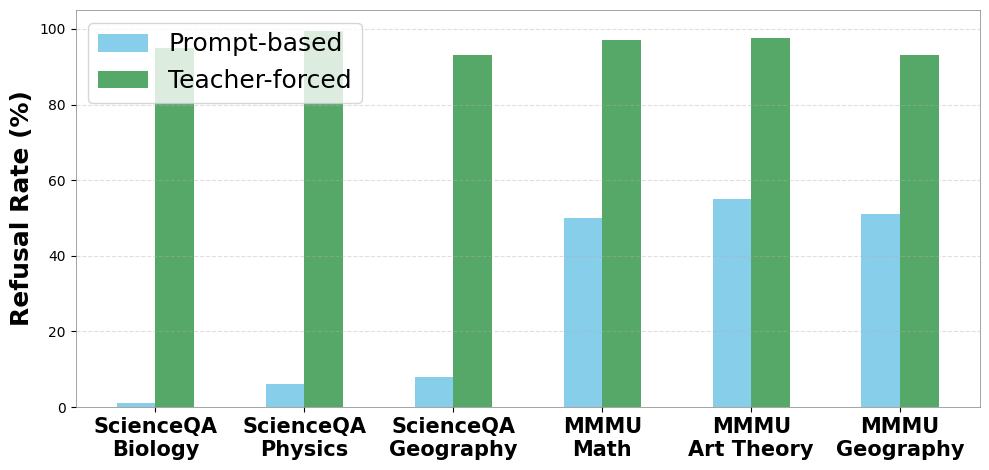

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# ----- data from your table -----
categories = [
    "ScienceQA\nBiology", "ScienceQA\nPhysics", "ScienceQA\nGeography",
    "MMMU\nMath", "MMMU\nArt Theory", "MMMU\nGeography"
]
prompt_based = np.array([1.0, 6.0, 8.0, 50.0, 55.0, 51.0])
teacher_forced = np.array([95.0, 99.5, 93.0, 97.0, 97.5, 93.0])

# ----- plot (grouped bars) -----
x = np.arange(len(categories))
width = 0.26

fig, ax = plt.subplots(figsize=(10, 4.8))

ax.bar(x - width/2, prompt_based, width, label="Prompt-based", color="#87CEEB")
ax.bar(x + width/2, teacher_forced, width, label="Teacher-forced", color="#55A867")

ax.set_ylabel("Refusal Rate (%)", fontsize=18, fontweight="bold")
# ax.set_xlabel("Dataset / Subject")
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=15, fontweight="bold")
ax.set_ylim(0, 105)

ax.legend(loc="upper left", fontsize=18)
ax.grid(axis="y", linestyle="--", alpha=0.4)

# 修改四周边框的粗细和颜色
for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_linewidth(0.5)      # 设置边框粗细（默认是1）
    ax.spines[spine].set_color('gray')    # 设置边框颜色

# ax.set_title("Ablation: System Prompt-based vs Teacher-forced")

plt.tight_layout()
# plt.show()
plt.savefig("/home/ubuntu/jiaxi/results/teacher_ablation.pdf", dpi=300)